In [7]:
import pandas as pd
import numpy as np
import os

#os.chdir("/Users/Jaebin/Documents/Stevens Fall 2019/Applied Analytics/") #set general working directory

county = pd.read_csv("Complete county file.csv") # specific directory for where the dataset is

In [8]:
county.columns

Index(['fipstate', 'fipscty', 'naics', 'empflag', 'emp_nf', 'emp', 'qp1_nf',
       'qp1', 'ap_nf', 'ap', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4', 'censtate', 'cencty'],
      dtype='object')

In [10]:
county.shape

(2124893, 26)

In [12]:
county['fipstate'].value_counts()

48    20613
13    13100
51    12212
37    11375
39    11178
17     9916
18     9829
42     9723
29     9693
26     9583
36     9308
6      9281
12     9153
21     8663
27     8542
55     8395
47     8368
19     7970
20     6752
1      6416
40     6121
28     6100
22     5925
5      5885
8      5877
45     5178
53     5076
31     4986
41     4311
34     4146
54     4003
46     3634
24     3612
16     3504
30     3448
38     2887
49     2843
35     2785
25     2778
23     2195
56     2154
4      2089
2      1724
50     1633
9      1587
33     1554
32     1496
44      878
15      690
10      646
11      185
Name: fipstate, dtype: int64

In [11]:
# randomly sample 20000 samples
county = county.sample(300000).reset_index(drop = True)

In [13]:
county = county[(county.fipstate == 48)]

In [14]:
county.head()

,fipstate,fipscty,naics,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,...,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
19,48,183,62421/,NaN,J,2,J,7,J,31,...,0,0,0,0,0,0,0,0,74,183
29,48,85,325411,B,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,85
92,48,225,48423/,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,225
101,48,155,62191/,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,155
114,48,121,32519/,B,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,121


In [15]:
# combine small size companies into one category
county["sz_small"] = county["n1_4"] + county["n5_9"] + county["n10_19"] + county["n20_49"] + county["n50_99"]

# combine medium size companies into one category
county["sz_med"] = county["n100_249"] + county["n250_499"] + county["n500_999"]

# combine large size companies into one category
county["sz_lrg"] = county["n1000_1"] + county["n1000_2"] + county["n1000_3"] + county["n1000_4"]

county = county.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf", "censtate", "cencty",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [16]:
county.dtypes

fipstate     int64
fipscty      int64
naics       object
emp          int64
qp1          int64
ap           int64
est          int64
sz_small     int64
sz_med       int64
sz_lrg       int64
dtype: object

# for NACIS, removing "-" and "/" and converting to integers
# takes several minutes, you'll know when it's done from the icon on the window tab

for i in range(0,len(county["naics"])):
    a = str(county["naics"][i])
    if county["naics"][i] == "------":
        county["naics"][i] = 0
    elif "-" in county["naics"][i]:
        county["naics"][i] = int(a.replace("-", ""))        
    elif "/" in county["naics"][i]:
        county["naics"][i] = int(a.replace("/", ""))
    else:
        county["naics"][i] = int(a)

In [17]:
county.naics=county.naics.replace('-','',regex=True)
county.naics=county.naics.replace('/','',regex=True)

In [18]:
county.head()

,fipstate,fipscty,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
19,48,183,62421,2,7,31,3,3,0,0
29,48,85,325411,0,0,0,1,1,0,0
92,48,225,48423,0,0,0,1,1,0,0
101,48,155,62191,0,0,0,1,1,0,0
114,48,121,32519,0,0,0,1,1,0,0


In [19]:
county = county.add_prefix('COUNTY_')


In [20]:
county.head()

,COUNTY_fipstate,COUNTY_fipscty,COUNTY_naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg
19,48,183,62421,2,7,31,3,3,0,0
29,48,85,325411,0,0,0,1,1,0,0
92,48,225,48423,0,0,0,1,1,0,0
101,48,155,62191,0,0,0,1,1,0,0
114,48,121,32519,0,0,0,1,1,0,0


In [21]:
county.columns = ['COUNTY_fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp',
       'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small',
       'COUNTY_sz_med', 'COUNTY_sz_lrg']

## Your tasks

1. change the dataset your respective dataset
2. identify the columns and make sure the names are the same
3. if you have columns that aren't in the County data, use your judgement to drop or include it
4. go over the project proposal and understand exactly what we're trying to do
5. feel free to ask questions if you have. But if it's coding related, please try it on your own first
   and ask me or Sandeep if you really can't figure it out.

In [22]:
US_file = pd.read_csv('complete US file.csv',header=0, encoding='UTF-8')
US_file = US_file.drop(['uscode',  'empflag', 'emp_nf', 'qp1_nf',
       'ap_nf', 'f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000'],axis=1)

In [23]:
# combine small size companies into one category
US_file["sz_small"] = US_file["n1_4"] + US_file["n5_9"] + US_file["n10_19"] + US_file["n20_49"] + US_file["n50_99"]

# combine medium size companies into one category
US_file["sz_med"] = US_file["n100_249"] + US_file["n250_499"] + US_file["n500_999"]

# combine large size companies into one category
US_file["sz_lrg"] = US_file["n1000"] 

US_file = US_file.drop(columns = [
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000" ])

In [24]:
US_file.naics=US_file.naics.replace('-','',regex=True)
US_file.naics=US_file.naics.replace('/','',regex=True)
#US_file.lfo=US_file.lfo.replace('-','',regex=True)

In [25]:
US_file.head()

,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,,-,126752238,1604399617,6435142055,7757807,7568676,181471,7660
1,,C,55545767,888858468,3363492811,2114076,2014258,95948,3870
2,,Z,33631600,313406667,1405230530,3251536,3213293,37534,709
3,,S,4749707,37112956,157784272,899679,895824,3715,140
4,,P,14926406,167485849,682046178,883952,861739,21636,577


In [26]:
US_file = US_file.add_prefix('US_')



In [27]:
US_file.columns

Index(['US_naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [28]:
US_file.columns = ['naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [29]:
state = pd.read_csv("complete state file.csv") # specific directory for where the dataset is

In [30]:
# combine small size companies into one category
state["sz_small"] = state["n1_4"] + state["n5_9"] + state["n10_19"] + state["n20_49"] + state["n50_99"]

# combine medium size companies into one category
state["sz_med"] = state["n100_249"] + state["n250_499"] + state["n500_999"]

# combine large size companies into one category
state["sz_lrg"] = state["n1000"] 
state = state.drop(columns = ["f500_999","f1_4","e1_4nf","empflag","q1_4nf","a1_4nf","e5_9nf","q5_9nf","a5_9nf","f10_19","e10_19nf","q10_19nf","a10_19nf","f20_49","e20_49nf","q20_49nf","emp_nf", "qp1_nf", "ap_nf", "censtate","f1000",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000","e50_99nf","q50_99nf","a50_99nf","f100_249","e100_249nf","q100_249nf","a100_249nf","e250_499nf","q250_499nf","a250_499nf","e500_999nf","q500_999nf","a500_999nf","e1000nf","q1000nf","a1000nf",
                                    'e1_4', 'q1_4',
                               'a1_4', 'f5_9', 'e5_9', 'q5_9', 'a5_9', 'e10_19', 'q10_19', 'a10_19',
                               'e20_49', 'q20_49', 'a20_49nf', 'a20_49', 'f50_99', 'e50_99', 'q50_99',
                               'a50_99', 'e100_249', 'q100_249', 'a100_249', 'f250_499', 'e250_499',
                               'q250_499', 'a250_499', 'e500_999', 'q500_999', 'a500_999', 'e1000',
                               'q1000', 'a1000', ])

In [31]:
state.head()

,fipstate,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,1,------,-,1673249,16667378,68970623,99584,97088,2404,92
1,1,------,C,766685,8868459,35219759,28682,27284,1349,49
2,1,------,Z,473577,4150278,18378077,37856,37302,541,13
3,1,------,S,67223,490235,2119042,11465,11413,50,2
4,1,------,P,180868,1518668,6433918,11941,11691,243,7


In [32]:
state.naics=state.naics.replace('-','',regex=True)

In [33]:
state.naics=state.naics.replace('/','',regex=True)

In [34]:
state.isnull().sum()

fipstate    0
naics       0
lfo         0
emp         0
qp1         0
ap          0
est         0
sz_small    0
sz_med      0
sz_lrg      0
dtype: int64

In [35]:
state.shape

(448310, 10)

In [61]:
#state['fipstate'].value_counts()


In [37]:
state = state.add_prefix('state_')



In [38]:
state.columns

Index(['state_fipstate', 'state_naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg'],
      dtype='object')

In [39]:
state.columns = ['state_fipstate', 'naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg']

In [40]:
metro = pd.read_csv("complete metropolitan area file.csv") # specific directory for where the dataset is

In [41]:
# combine small size companies into one category
metro["sz_small"] = metro["n1_4"] + metro["n5_9"] + metro["n10_19"] + metro["n20_49"] + metro["n50_99"]

# combine medium size companies into one category
metro["sz_med"] = metro["n100_249"] + metro["n250_499"] + metro["n500_999"]

# combine large size companies into one category
metro["sz_lrg"] = metro["n1000_1"] + metro["n1000_2"] + metro["n1000_3"] + metro["n1000_4"]



In [42]:
metro = metro.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [43]:
metro.naics=metro.naics.replace('-','',regex=True)
metro.naics=metro.naics.replace('/','',regex=True)

In [44]:
metro.head()

,msa,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,10100,,19533,173691,746190,1418,1390,27,1
1,10100,11,20,188,1161,8,8,0,0
2,10100,115,20,188,1161,8,8,0,0
3,10100,1151,20,188,1159,7,7,0,0
4,10100,11511,20,188,1159,7,7,0,0


In [45]:
metro = metro.add_prefix('metro_')

In [46]:
metro.columns

Index(['metro_msa', 'metro_naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg'],
      dtype='object')

In [47]:
metro.columns = ['metro_msa', 'naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg']

In [48]:
cs = [county,state] #making a combined dataframe of train.csv and train_hospitalization

In [49]:
from functools import reduce

In [50]:
C_S = reduce(lambda left,right: pd.merge(left,right,on='naics'), cs) #reducting naics to 1 from 2

In [56]:
C_S.head()

,COUNTY_fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_fipstate,state_lfo,state_emp,state_qp1,state_ap,state_est,state_sz_small,state_sz_med,state_sz_lrg
0,48,183,62421,2,7,31,3,3,0,0,1,-,285,1922,8083,39,39,0,0
1,48,183,62421,2,7,31,3,3,0,0,1,C,0,0,0,1,1,0,0
2,48,183,62421,2,7,31,3,3,0,0,1,N,284,1921,8079,38,38,0,0
3,48,183,62421,2,7,31,3,3,0,0,2,-,218,1627,6777,33,33,0,0
4,48,183,62421,2,7,31,3,3,0,0,2,Z,0,0,0,1,1,0,0


In [51]:
csus= [C_S,US_file]

In [57]:
S_US = reduce(lambda left,right: pd.merge(left,right,on='naics'), csus) #reducting naics to 1 from 2

In [58]:
S_US.head()

,COUNTY_fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,...,state_sz_med,state_sz_lrg,US_lfo,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,183,62421,2,7,31,3,3,0,0,...,0,0,-,40916,282217,1210965,4660,4625,35,0
1,48,183,62421,2,7,31,3,3,0,0,...,0,0,C,374,1994,8988,52,52,0,0
2,48,183,62421,2,7,31,3,3,0,0,...,0,0,Z,849,4582,20604,53,51,2,0
3,48,183,62421,2,7,31,3,3,0,0,...,0,0,S,405,1978,8094,78,78,0,0
4,48,183,62421,2,7,31,3,3,0,0,...,0,0,P,167,677,2920,10,10,0,0


In [60]:
S_US.shape

(39088818, 27)

In [79]:
np.sqrt(39088818)

6252.105085489206

In [81]:
100*(1/6252.105085489206)

0.01599461279563175

In [65]:

Texas_data= S_US


In [104]:
Texas_data['US_lfo'].head()

0    -
1    C
2    Z
3    S
4    P
Name: US_lfo, dtype: object

In [105]:
Texas_data['state_lfo'].head()

0    -
1    -
2    -
3    -
4    -
Name: state_lfo, dtype: object

COUNTY_Avg_AP_I annual Payroll of an industry = Annual Payroll for the industry / No. of establishments in
the industry

In [70]:
Texas_data['COUNTY_Avg_AP_I'] = Texas_data['COUNTY_ap'] / Texas_data['COUNTY_est']

In [74]:
Texas_data['State_Avg_AP_I'] = Texas_data['state_ap'] / Texas_data['state_est']

In [75]:
Texas_data['US_Avg_AP_I'] = Texas_data['US_ap'] / Texas_data['US_est']

In [82]:
First_review_data = Texas_data.sample(6254).reset_index(drop = True)

In [102]:
First_review_data.to_csv("texas_data.csv")

In [91]:
First_review_data.dtypes

COUNTY_fipstate      int64
COUNTY_fipscty       int64
naics               object
COUNTY_emp           int64
COUNTY_qp1           int64
COUNTY_ap            int64
COUNTY_est           int64
COUNTY_sz_small      int64
COUNTY_sz_med        int64
COUNTY_sz_lrg        int64
state_fipstate       int64
state_lfo           object
state_emp            int64
state_qp1            int64
state_ap             int64
state_est            int64
state_sz_small       int64
state_sz_med         int64
state_sz_lrg         int64
US_lfo              object
US_emp               int64
US_qp1               int64
US_ap                int64
US_est               int64
US_sz_small          int64
US_sz_med            int64
US_sz_lrg            int64
COUNTY_Avg_AP_I    float64
State_Avg_AP_I     float64
US_Avg_AP_I        float64
dtype: object

In [112]:
Ctrain_Y=First_review_data['COUNTY_Avg_AP_I']
Strain_Y=First_review_data['State_Avg_AP_I']
UStrain_Y=First_review_data['US_Avg_AP_I']

In [113]:
categorical = First_review_data.select_dtypes(include=['object']) 

In [114]:
categorical.columns

Index(['naics', 'state_lfo', 'US_lfo'], dtype='object')

In [115]:
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I'])

In [116]:
numerical.head()

,COUNTY_fipstate,COUNTY_fipscty,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_fipstate,...,state_sz_small,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,363,36,165,723,5,5,0,0,18,...,38,2,0,61929,390343,1672883,6603,6577,26,0
1,48,101,0,0,0,1,1,0,0,54,...,45,0,0,2690541,14992208,60642749,65399,55819,9579,1
2,48,499,0,0,0,1,1,0,0,26,...,94,0,0,8214,34637,154744,1197,1196,1,0
3,48,51,25,129,520,7,7,0,0,35,...,13,0,0,407445,2679442,11334008,52369,51947,420,2
4,48,189,0,0,0,1,1,0,0,36,...,44,4,0,75,509,3592,12,12,0,0


In [117]:
from sklearn import preprocessing 

In [118]:
standardized_num = preprocessing.scale(numerical)

In [119]:
standardized_num = pd.DataFrame(standardized_num)

In [120]:
CAT_DATA = pd.get_dummies(categorical)

In [121]:
FINAL_Texas_DATA = pd.concat([CAT_DATA,standardized_num],axis=1)

In [123]:
FINAL_Texas_DATA.head()

,naics_,naics_11,naics_113,naics_1131,naics_11311,naics_1133,naics_11331,naics_114,naics_1142,naics_114210,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,-0.167346,-0.132997,-0.100598,-0.103539,-0.105682,-0.106747,-0.093562,-0.092868,-0.114575,-0.103401
1,0,0,0,0,0,0,0,0,0,0,...,-0.164055,-0.171819,-0.100598,0.722138,0.248613,0.252167,0.218740,0.175301,1.911096,-0.098618
2,0,0,0,0,0,0,0,0,0,0,...,-0.141017,-0.171819,-0.100598,-0.120412,-0.114313,-0.115987,-0.122277,-0.122173,-0.119877,-0.103401
3,0,0,0,0,0,0,0,0,0,0,...,-0.179100,-0.171819,-0.100598,0.004991,-0.050140,-0.047946,0.149529,0.154215,-0.031029,-0.093836
4,0,0,0,0,0,0,0,0,0,0,...,-0.164525,-0.094175,-0.100598,-0.122968,-0.115141,-0.116907,-0.128571,-0.128621,-0.120089,-0.103401


In [152]:
FINAL_Texas_DATA.to_csv("Preprocessed_texas_data.csv")

In [154]:
First_review_data.columns

Index(['COUNTY_fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp',
       'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small',
       'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_fipstate', 'state_lfo',
       'state_emp', 'state_qp1', 'state_ap', 'state_est', 'state_sz_small',
       'state_sz_med', 'state_sz_lrg', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap',
       'US_est', 'US_sz_small', 'US_sz_med', 'US_sz_lrg', 'COUNTY_Avg_AP_I',
       'State_Avg_AP_I', 'US_Avg_AP_I'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224a0990>]],
      dtype=object)

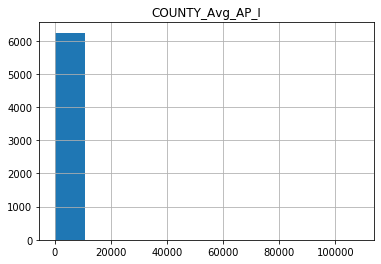

In [158]:
First_review_data.hist(column='COUNTY_Avg_AP_I')

In [160]:
First_review_data['COUNTY_Avg_AP_I'].describe()

count      6254.000000
mean        314.078810
std        1994.326329
min           0.000000
25%           0.000000
50%           0.000000
75%         219.893750
max      108414.666667
Name: COUNTY_Avg_AP_I, dtype: float64

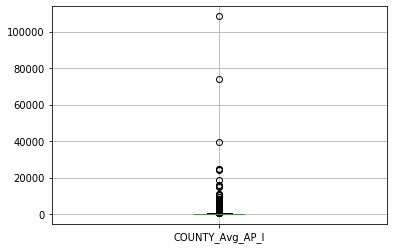

In [157]:
First_review_data.boxplot(column='COUNTY_Avg_AP_I')

In [85]:
##### Model for county

In [ ]:
CTrain_X=
Ctrain_Y=FINAL_Texas_DATA['']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_Ctrain, X_Cval, y_Ctrain, y_Cval = train_test_split(FINAL_Texas_DATA,Ctrain_Y,test_size = 0.4,random_state = 123)

In [133]:
y_Ctrain.dtypes

dtype('float64')

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics, model_selection
from sklearn import datasets

In [135]:
linreg = LinearRegression()


In [136]:
linreg.fit(X_Ctrain, y_Ctrain) #fitting the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
y_pred_County = linreg.predict(X_Cval)
print(metrics.mean_squared_error(y_Cval, y_pred_County))
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, y_pred_train)

5.754261151273957e+25


In [146]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lm = GridSearchCV(linreg, hyperparameters, cv=5, verbose=0) #fitting the Gridsearch model


In [151]:
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
lm

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [148]:
best_model = lm.fit(X_Ctrain, y_Ctrain)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
best_model = linreg.fit(X_Ctrain, y_Ctrain,)

In [150]:
y_pred_County = best_model.predict(X_Cval)
print(metrics.mean_squared_error(y_Cval, y_pred_County))

5.754261151273957e+25
